In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans


In [16]:
df = pd.read_csv("creditcard.csv")

In [33]:
 df.shape
 df.columns.tolist()
 df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

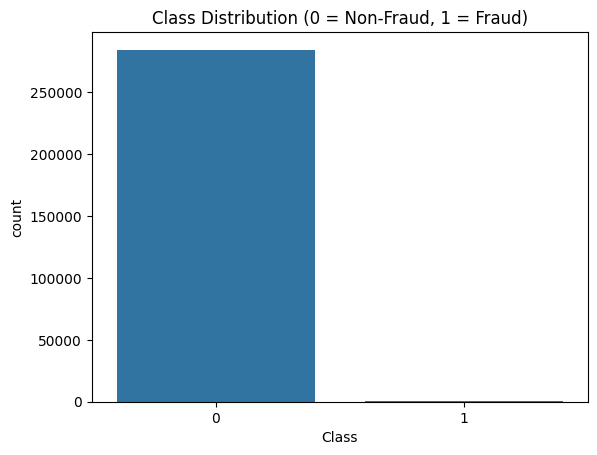

In [18]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

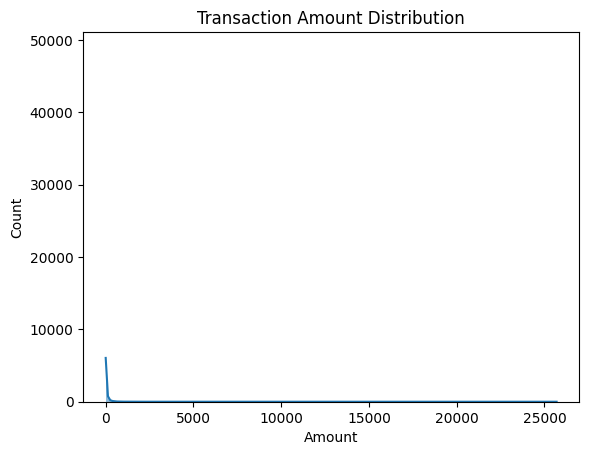

In [19]:
sns.histplot(df['Amount'], kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

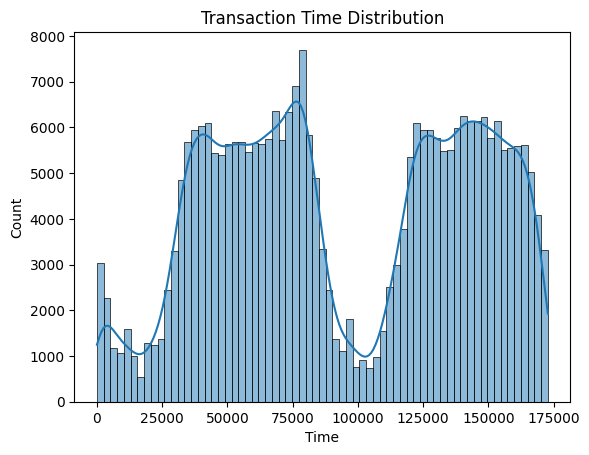

In [20]:
sns.histplot(df['Time'], kde=True)
plt.title("Transaction Time Distribution")
plt.show()

In [21]:
print(df.head())
print(df.info())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
X = df.drop('Class', axis=1)   # Features only
y = df['Class']  

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

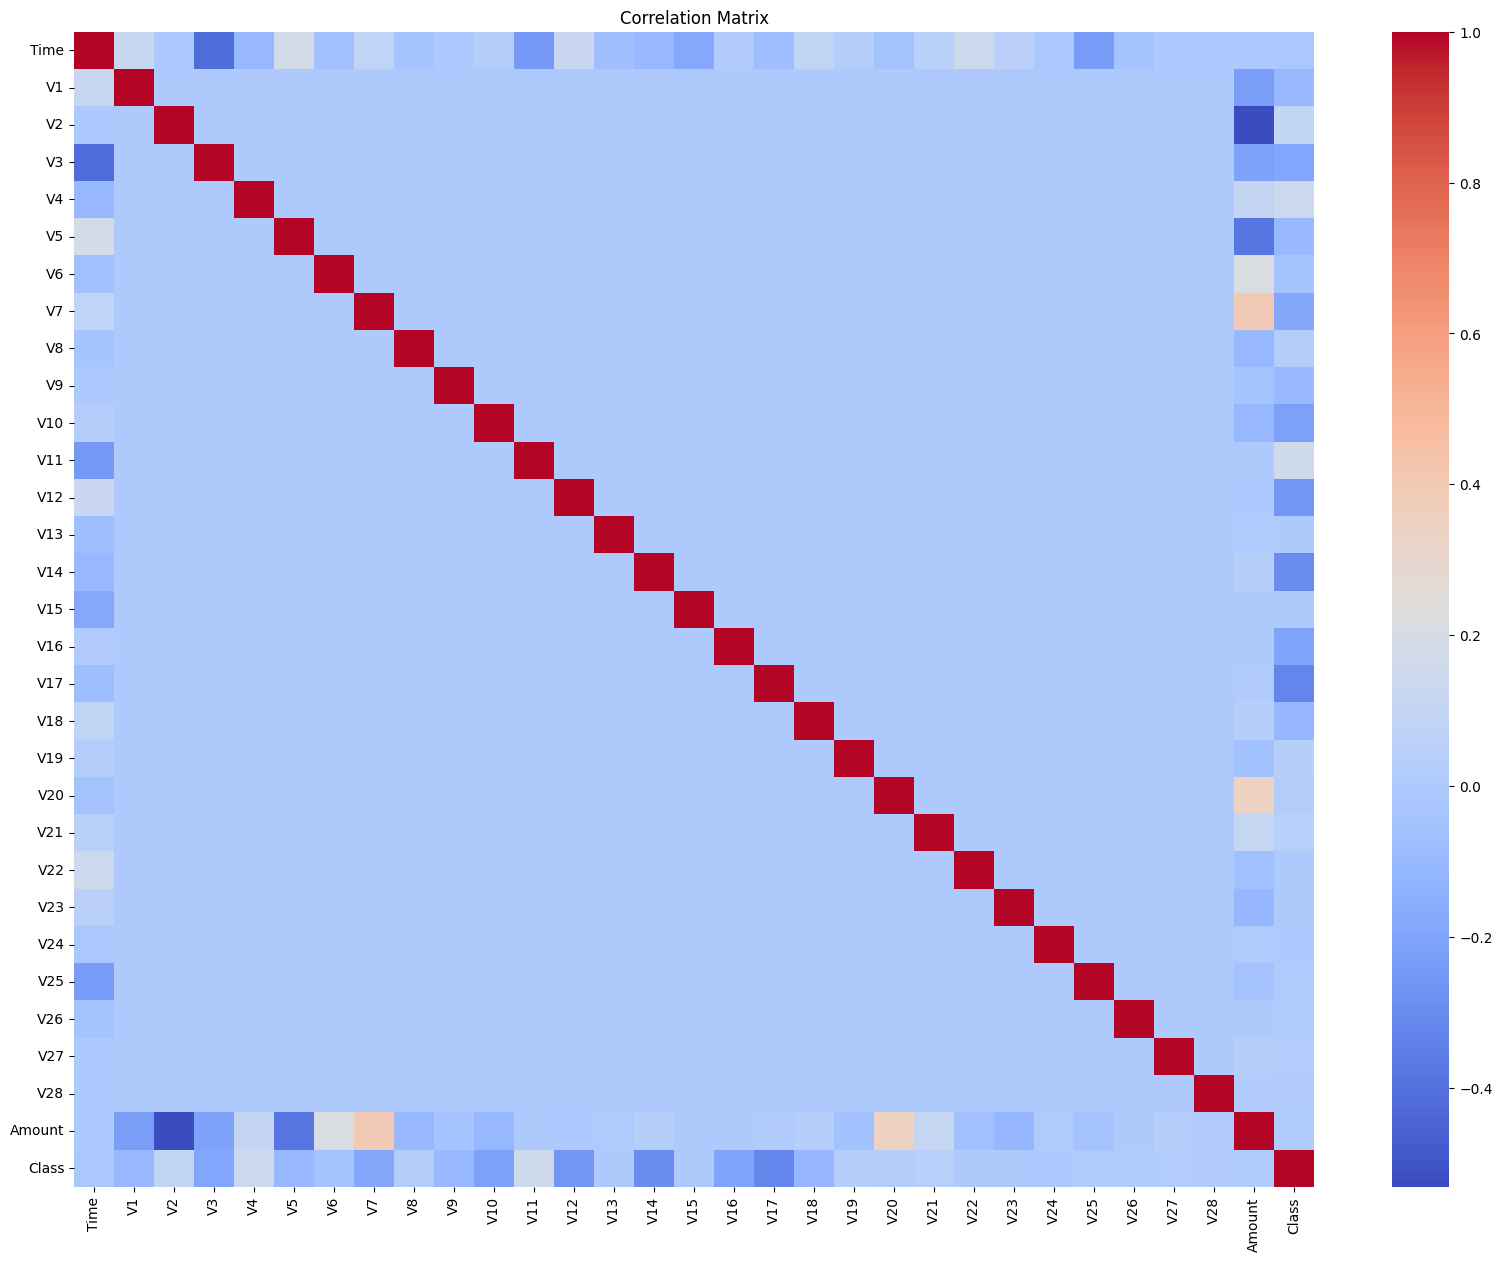

In [25]:
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [28]:
print("\nConfusion Matrix:\n", confusion_matrix(y, cluster_labels))
print("\nClassification Report:\n", classification_report(y, cluster_labels))


Confusion Matrix:
 [[155038 129277]
 [   299    193]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.55      0.71    284315
           1       0.00      0.39      0.00       492

    accuracy                           0.55    284807
   macro avg       0.50      0.47      0.35    284807
weighted avg       1.00      0.55      0.70    284807



In [29]:
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [37]:
y_pred = kmeans.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
acc = max(accuracy_score(y_test, y_pred), accuracy_score(y_test, 1 - y_pred))

In [39]:
acc

0.5428706857203047